<a href="https://colab.research.google.com/github/Britany01/MineriaDeDatos/blob/main/Tecnicas_Equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio de técnicas de mineria**

**Equipo** **6**; gpo: 01, *lunes*. 

Integrantes:

* 1794593 Gutiérrez Herrera Luisa Fernanda.
* 1796551 Sánchez Bracho Joss Alberth
* 1847156 Montemayor Guerra Diego Marcelo
* 1852645 Ovalle Salas Britany
* 1861240 Ávila Rodríguez Delfino Azael

Nuestra base de datos se llama *Video Game Sales* y el url de la página donde se encuentra es: *https://www.kaggle.com/gregorut/videogamesales*

Lo primero que vamos a realizar para las tecnicas de mineria es limpiar nuestra base datos, para posteriormente generar bases mas resumidas para aplicar las distintas tecnicas de nuestro interes.

In [ ]:
import pandas as pd
import numpy as np

bd= pd.read_csv("vgsales.csv") #Se lee y asigna la base de datos a la variable bd

#Gracias a el analisis de visualizacion, eliminaremos las siguientes variables
bdn= bd.drop(['EU_Sales','JP_Sales','Other_Sales'],axis=1) 

#Reemplazaremos los datos nulos por ceros para un mejor manejo de la informacion
bdc = bdn.fillna(0) 

#Le cambiaremos los nombres a las columnas para una mejor interpretacion de los datos
bd1=bdc.rename(columns = {'Rank':'Ranking','Name':'Nombre','Platform':'Plataforma', 'Year':'Año', 'Genre':'Genero',
                     'Publisher':'Desarrolladora','NA_Sales':'Ventas_Norte_America_(MDD)', 'Global_Sales':'Ventas_Globales_(MDD)'})
bd1.head(3)

,Ranking,Nombre,Plataforma,Año,Genero,Desarrolladora,Ventas_Norte_America_(MDD),Ventas_Globales_(MDD)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,35.82


## **Regresión lineal:**

> Para esta técnica de minería nos basamos de: *https://rpubs.com/Joaquin_AR/226291?fbclid=IwAR0HLj4emZiRUGTHXkgiFRru-kUwBMD3QN5xBuWCn_vkkFpRZfn_Mwkw9bM* 

> En esta página encontramos toda la documentaciión referente a la regresión lineal en R. Utilizamos R ya que es el lenguaje con el que nos sentimos mas cómodos trabajando con el analisis estadístico.

Al tener la base de datos limpia procederemos a seleccionar las columnas de nuestro interés. En este caso lo que queremos comprobar es si existe algun modelo para analizar la relacion entre las ventas de videojuegos en Norteamérica con las ventas globales. Nuestra suposicion es que si puede haber algun modelo, ya que en el mapa de correlaciones nos encontramos con el dato de que la correlacion entre Ventas_Norte_America_(MDD) y Ventas_Globales_(MDD) es muy alta (de 0.9) lo que indica que estan relacionadas.

In [ ]:
#Crear base de datos para regresion lineal
#Buscamos evaluar la relacion entre las ventas en NA y las ventas globales de videojuegos

bd_reg = bd1.iloc[:, [6,7]]
bd_reg.to_csv (r'base_regresion.csv', index = False, header=True)
bd_reg

,Ventas_Norte_America_(MDD),Ventas_Globales_(MDD)
0,41.49,82.74
1,29.08,40.24
2,15.85,35.82
3,15.75,33.00
4,11.27,31.37
...,...,...
16593,0.01,0.01
16594,0.01,0.01
16595,0.00,0.01
16596,0.00,0.01


Al ya tener la base de datos con solo nuestras 2 variables de interes, podemos realizar el análisis estadístico en Rstudio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


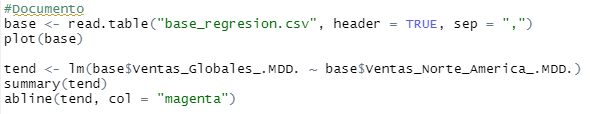

In [ ]:
#@title Codigo utilizado en R
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Codigo_regresion.png")

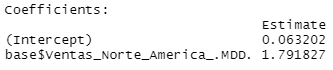

In [ ]:
#@title Coeficientes de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Coeficientes_regresion.png")

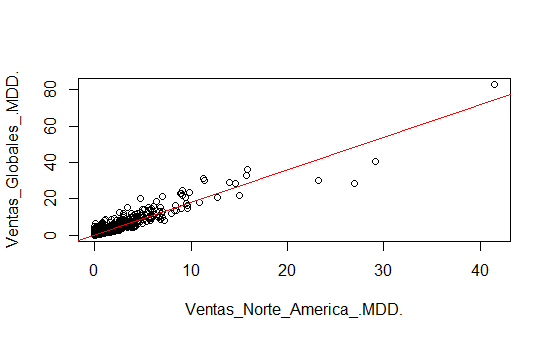

In [ ]:
#@title Gráfica de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Grafica_regresion.png")

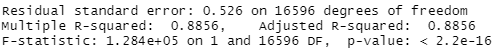

In [ ]:
#@title Indicadores de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Indicadores_regresion.png")

###Conclusiones
Como **métricas de evaluación** para esta técnica utilizaremos los indicadores del *p-valor* y la *R cuadrada ajustada*.

El *p-valor* es igual al 2.2e-16, lo cual es un valor muy pequeño lo que nos indica que si hay una relacion entre las variables Ventas_Norte_America_(MDD) y Ventas_Globales_(MDD) ya que es mucho menor a un alfa de 0.05. Por lo que podemos concluir que hay una relacion lineal entre estas variables con un 95% de confianza.

Con la R cuadrada ajustada, lo que estamos buscando es que se acerque lo mas posible al 1, ya que es una proporción que nos indica que porcentaje de los datos es explicado por el modelo. En nuestro caso la R cuadrada ajustada es igual a 0.8856 lo que es algo bueno, ya que explica un gran numero de nuestros datos.

Por lo tanto el modelo de regresión lineal con el que nos quedariamos seria con:

**Ventas_Globales_(MDD) = 0.063202 + 1.791827(Ventas_Norte_America_(MDD))**

Una de las áreas de oportunidad identificadas es que se puede buscar un mejor modelo, es decir, con un R cuadrada mayor al actual.